In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


# Load cleaned data sets
benin = pd.read_csv("data/benin_clean.csv")
sierraleone = pd.read_csv("data/sierra_leone_clean.csv")
togo = pd.read_csv("data/togo_clean.csv")

# Add a 'Country' column to each
benin['Country'] = 'Benin'
sierraleone['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

# Combine into one DataFrame
combined = pd.concat([benin, sierraleone, togo], ignore_index=True)


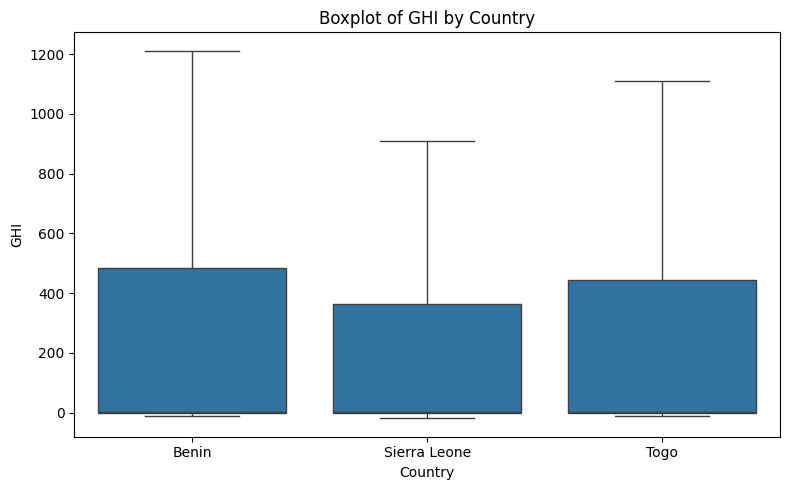

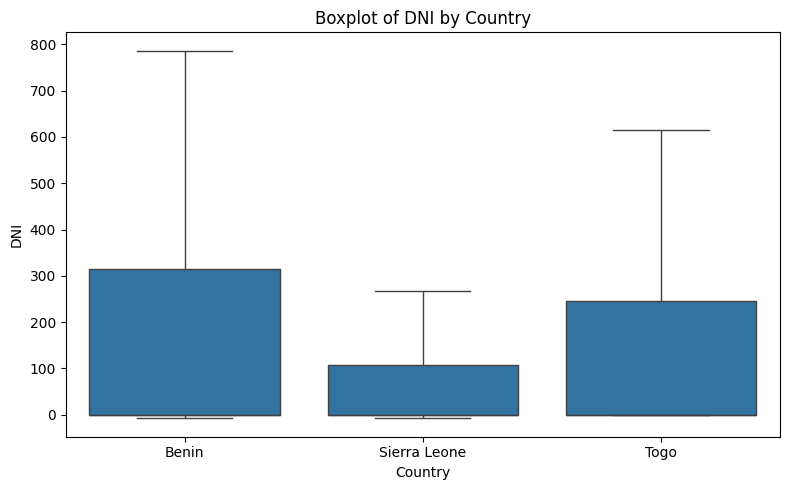

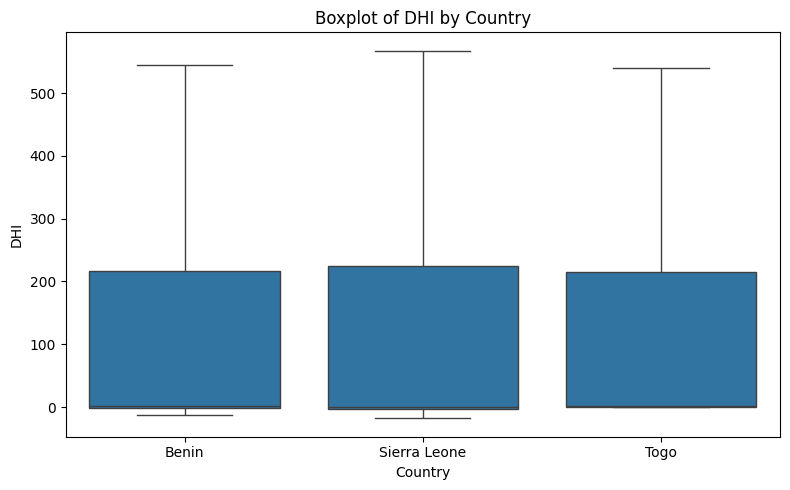

In [5]:
for measure in ['GHI', 'DNI', 'DHI']:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=combined, x='Country', y=measure, showfliers=False)
    plt.title(f'Boxplot of {measure} by Country')
    plt.tight_layout()
    plt.show()

In [6]:
summary = combined.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std']).round(2)
print(summary)


                 GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         240.56    1.8  331.13  167.19   -0.1  261.71  115.36    1.6   
Sierra Leone  201.96    0.3  298.50  116.38   -0.1  218.65  113.72   -0.1   
Togo          230.56    2.1  322.53  151.26    0.0  250.96  116.44    2.5   

                      
                 std  
Country               
Benin         158.69  
Sierra Leone  158.95  
Togo          156.52  


In [8]:
from scipy.stats import f_oneway, kruskal

# Prepare data

ghi_benin = benin['GHI'].dropna()
ghi_sierra = sierraleone['GHI'].dropna()
ghi_togo = togo['GHI'].dropna()

# ANOVA
f_stat, p_anova = f_oneway(ghi_benin, ghi_sierra, ghi_togo)

# Kruskal–Wallis (non-parametric)
h_stat, p_kruskal = kruskal(ghi_benin, ghi_sierra, ghi_togo)

print(f"ANOVA p-value: {p_anova:.4f}")
print(f"Kruskal–Wallis p-value: {p_kruskal:.4f}")


ANOVA p-value: 0.0000
Kruskal–Wallis p-value: 0.0000


C:\Users\mike\AppData\Local\Temp\ipykernel_13032\2093484807.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ghi.values, y=avg_ghi.index, palette='viridis')


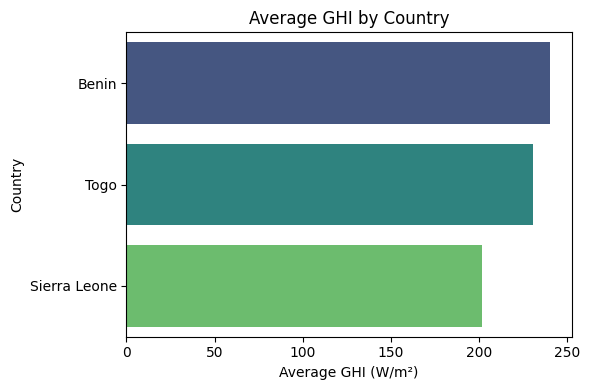

In [9]:
avg_ghi = combined.groupby('Country')['GHI'].mean().sort_values(ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x=avg_ghi.values, y=avg_ghi.index, palette='viridis')
plt.title('Average GHI by Country')
plt.xlabel('Average GHI (W/m²)')
plt.tight_layout()
plt.show()


## Key Observations

* **Benin exhibits the highest mean Global Horizontal Irradiance (GHI)** (240.56 W/m²), suggesting the strongest overall solar potential among the three countries analyzed (Benin, Sierra Leone, and Togo).
* All three countries show **considerable variability in their solar irradiance metrics** (GHI, DNI, DHI), indicated by high standard deviations, implying significant fluctuations in solar energy availability over time.
* The **ANOVA and Kruskal-Wallis tests both yielded p-values of 0.0000**, demonstrating a statistically significant difference in solar irradiance levels between the countries.